<a href="https://colab.research.google.com/github/Eng-Manal10/2end-upload/blob/main/Copy_of_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/T5-TWI/Week 4/4- Deep learning/1-Weekly Task/Datasets/Traffic_Accidents.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
#basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
#shape of the dataset
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (52000, 26)


In [ ]:
# View the first few rows of the dataset or can be determine as we need
print(df.head())

# View the last few rows of the dataset or can be determine as we need
print(df.tail())

# View a random sample of the dataset or can be determine as we need
print(df.sample(5))

   Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0               560530.0                103950.0   0.277298  50.812789   
1               508860.0                187170.0  -0.430574  51.572846   
2               314460.0                169130.0  -3.231459  51.414661   
3               341700.0                408330.0  -2.881800  53.568318   
4               386488.0                350090.0  -2.203020  53.047882   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0            47                3.0                   1                   1.0   
1             1                3.0                   2                   1.0   
2            62                3.0                   2                   1.0   
3             4                3.0                   1                   2.0   
4            21                3.0                   2                   2.0   

         Date  Day_of_Week  ...  2nd_Road_Class 2nd_Road_Number  \
0  27/1

In [ ]:
# summary statistics for numerical features
print(df.describe())

# summary statistics for categorical features
print(df.describe(include=['object', 'category']))

       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           52000.000000            5.200000e+04  52000.000000   
mean           440284.256846            2.998617e+05     -1.427193   
std             95109.751221            1.613624e+05      1.398249   
min             98480.000000            1.903000e+04     -6.895268   
25%            375540.000000            1.780100e+05     -2.366190   
50%            440950.000000            2.671800e+05     -1.391202   
75%            523500.000000            3.981492e+05     -0.214666   
max            654960.000000            1.203900e+06      1.753632   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  52000.000000  52000.000000       51678.000000        52000.000000   
mean      52.586684     30.401712           2.837145            1.834327   
std        1.453049     25.545581           0.402582            0.727856   
min       50.026153      1.000000           1.000000            1

In [ ]:
# Check for duplicated rows
duplicates = df[df.duplicated()]
print(f"Number of duplicated rows: {duplicates.shape[0]}")
print(duplicates)

Number of duplicated rows: 43
       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
8927                335170.0                389930.0  -2.976581  53.402184   
13879               527300.0                175420.0  -0.168864  51.463390   
20643               369510.0                427740.0  -2.463805  53.745134   
21078               354241.0                429411.0  -2.695562  53.759033   
22171               512770.0                178930.0  -0.376815  51.498017   
23074               526430.0                174920.0  -0.181560  51.459091   
24079               295133.0                665408.0  -3.677463  55.870435   
27268               416010.0                432200.0  -1.758488  53.785876   
29451               431348.0                581609.0  -1.509917  55.127895   
33253               513510.0                173910.0  -0.367770  51.452749   
34457               365551.0                399738.0  -2.520726  53.493204   
34821               365469.0      

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Accident_Severity        322
Number_of_Casualties    1041
Light_Conditions         544
Urban_or_Rural_Area       88
dtype: int64


In [ ]:
# Verify the column names in your DataFrame
print(df.columns)

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')


In [ ]:
# Frequency distribution of categorical variables
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Date value counts:
Date
04/11/2005    43
14/08/2007    36
22/09/2006    36
24/11/2006    34
12/12/2005    33
              ..
02/05/2010     3
25/02/2007     3
21/02/2013     2
24/03/2013     2
03/02/2013     1
Name: count, Length: 3286, dtype: int64

Local_Authority_(Highway) value counts:
Local_Authority_(Highway)
E10000016    1465
E10000030    1313
E10000017    1199
E10000014    1068
E10000012    1047
             ... 
S12000005      30
S12000027      14
EHEATHROW      13
S12000023       6
S12000013       6
Name: count, Length: 206, dtype: int64

Road_Type value counts:
Road_Type
Single carriageway    38852
Dual carriageway       7737
Roundabout             3475
One way street         1099
Slip road               542
Unknown                 295
Name: count, dtype: int64

Pedestrian_Crossing-Human_Control value counts:
Pedestrian_Crossing-Human_Control
None within 50 metres                 51718
Control by other authorised person      163
Control by school crossing patrol       119


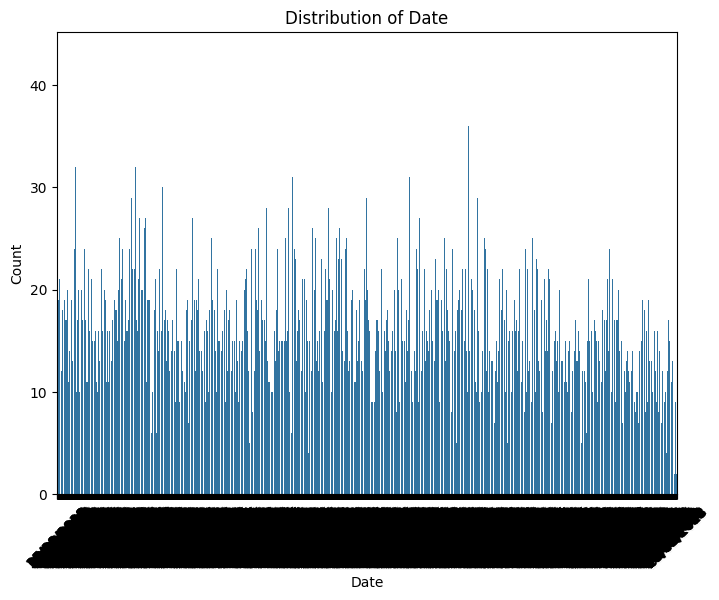

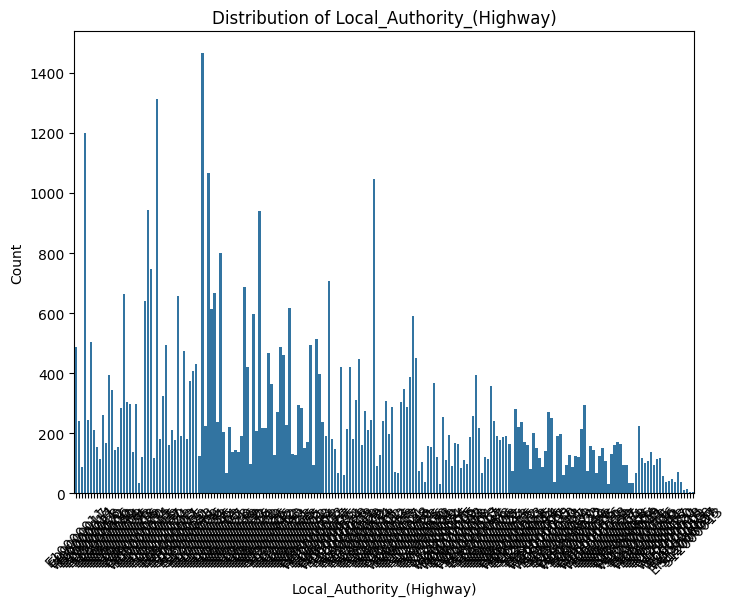

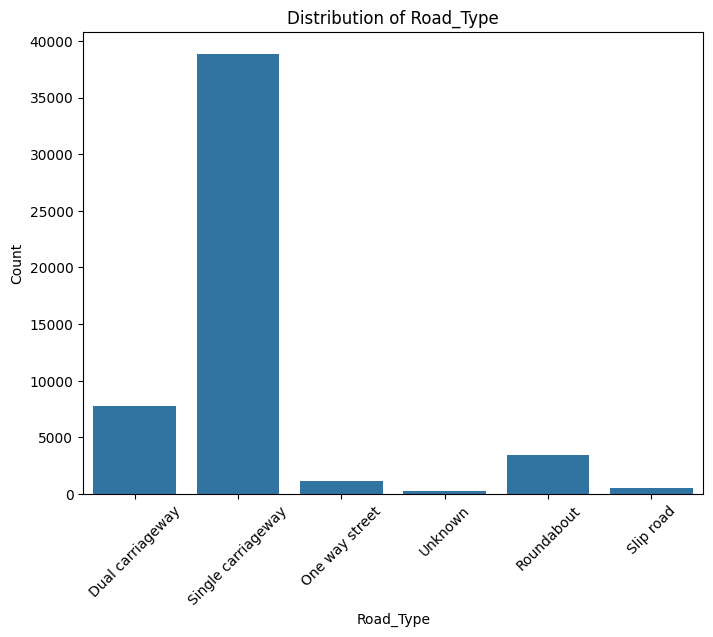

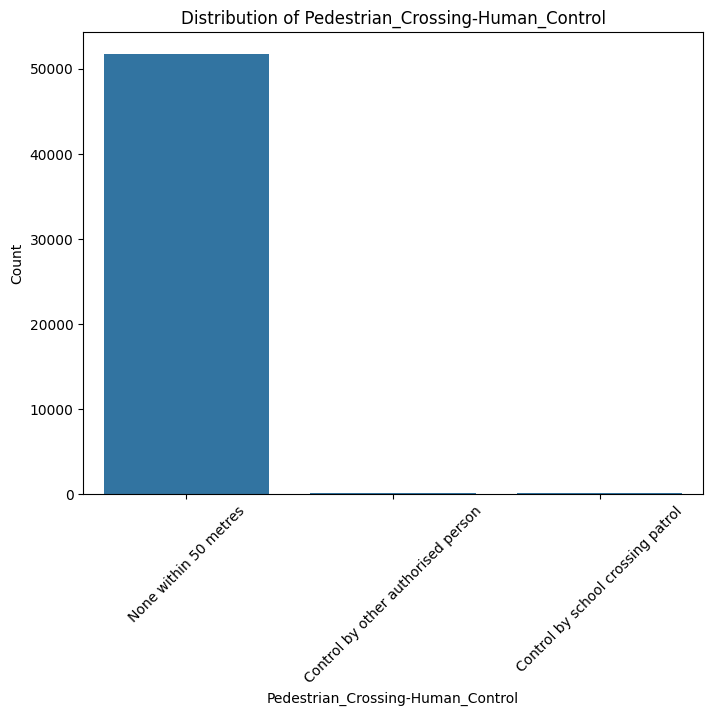

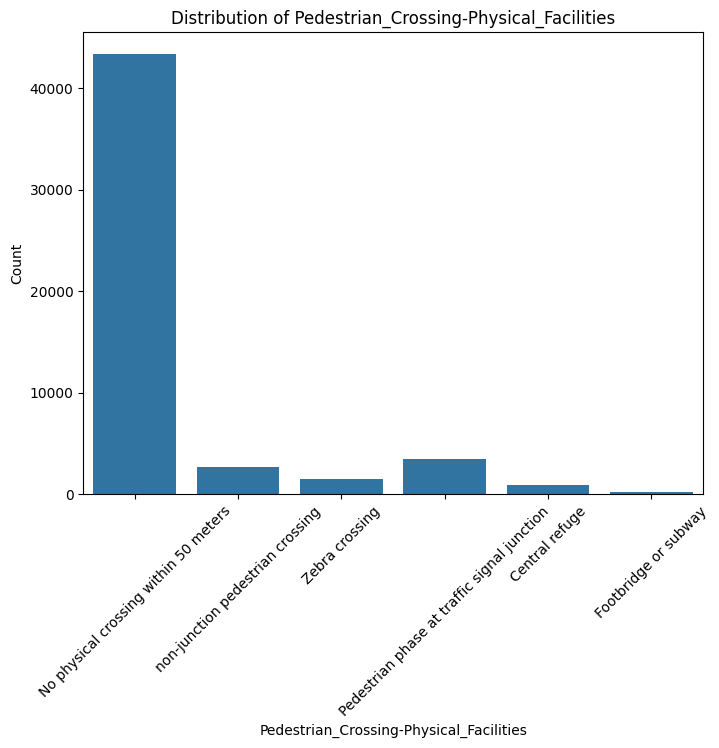

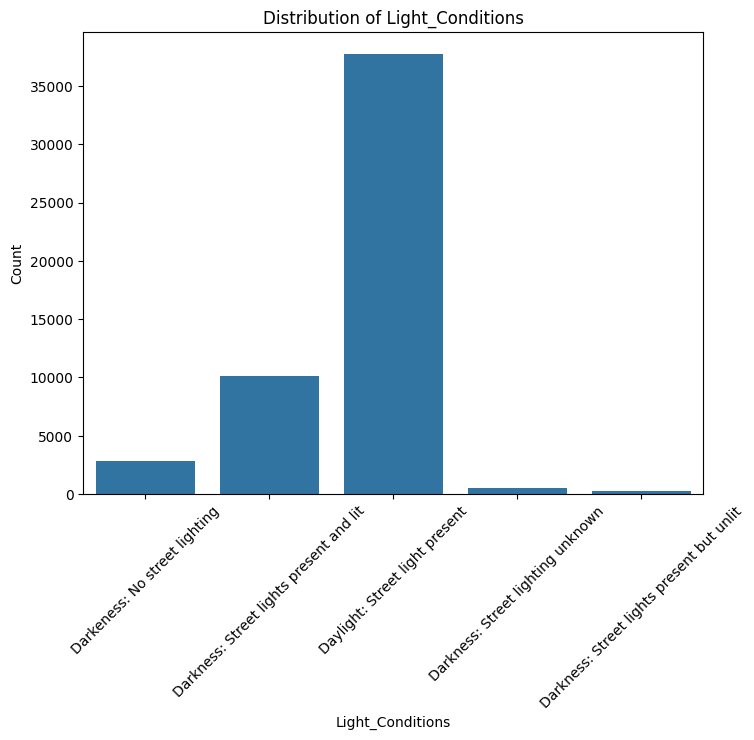

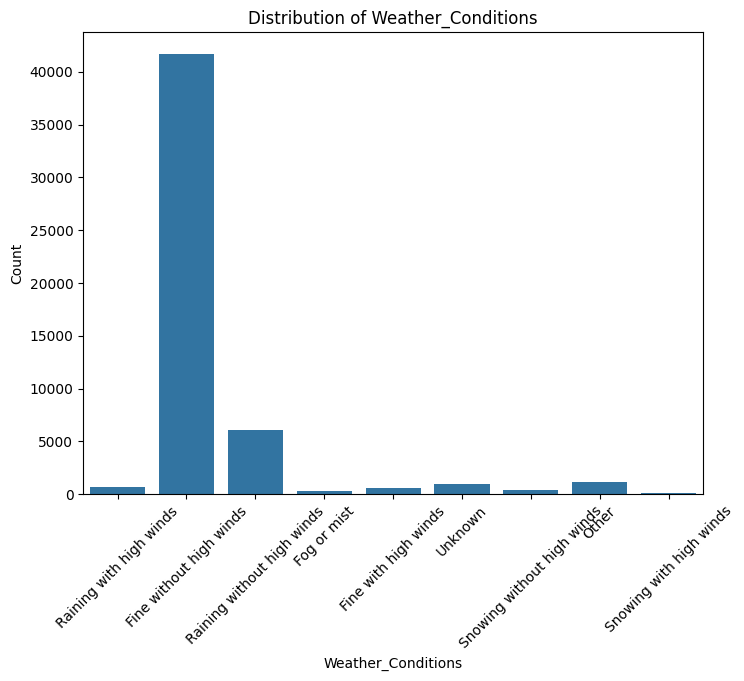

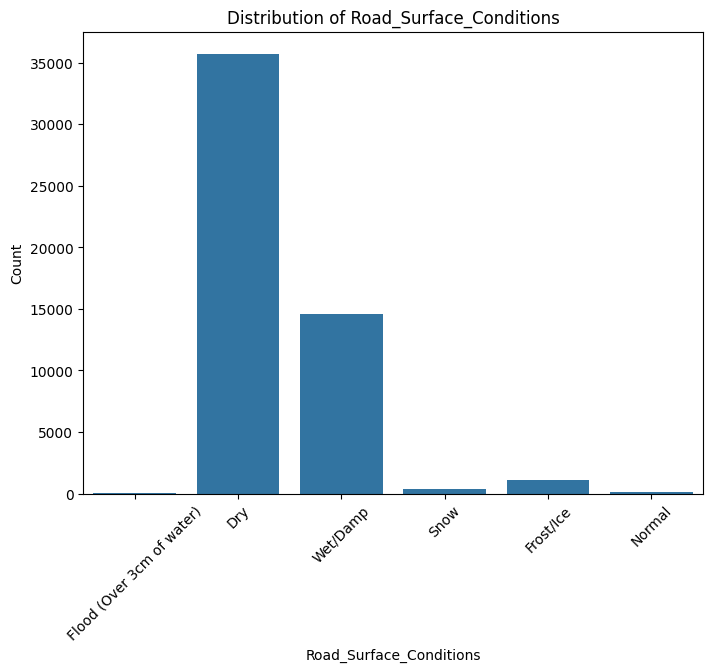

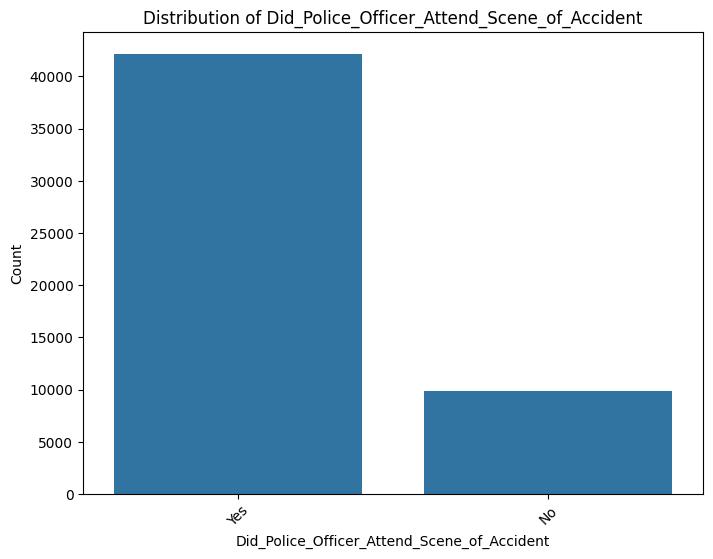

In [ ]:
# Bar plot of categorical features
for col in df.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


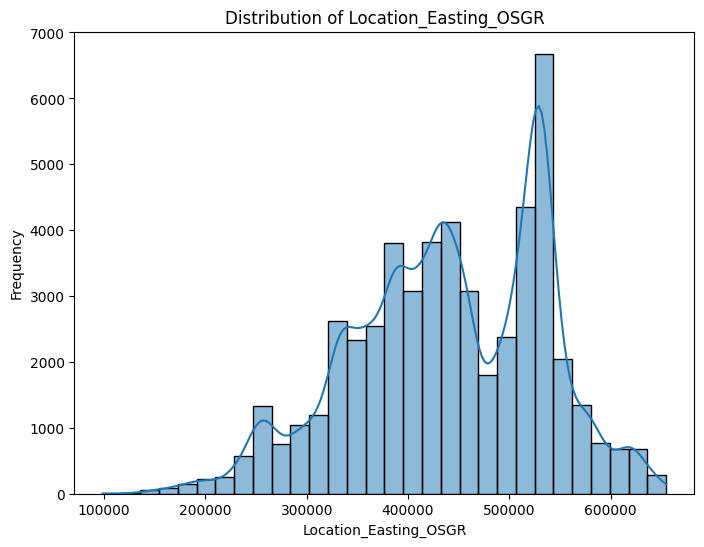

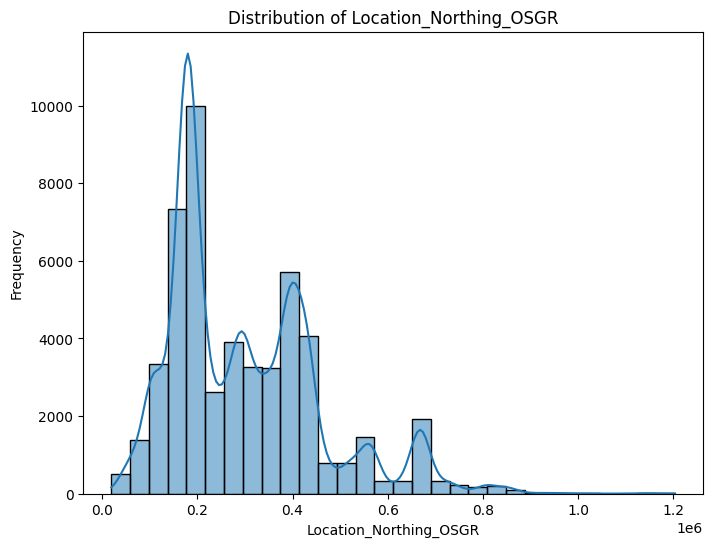

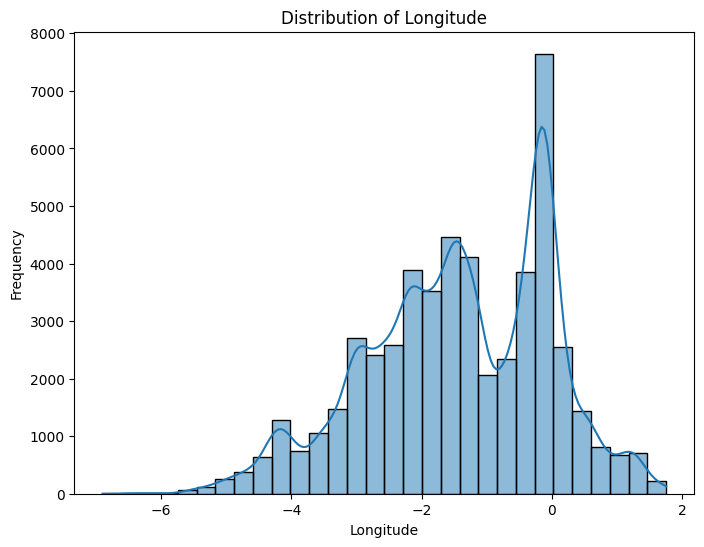

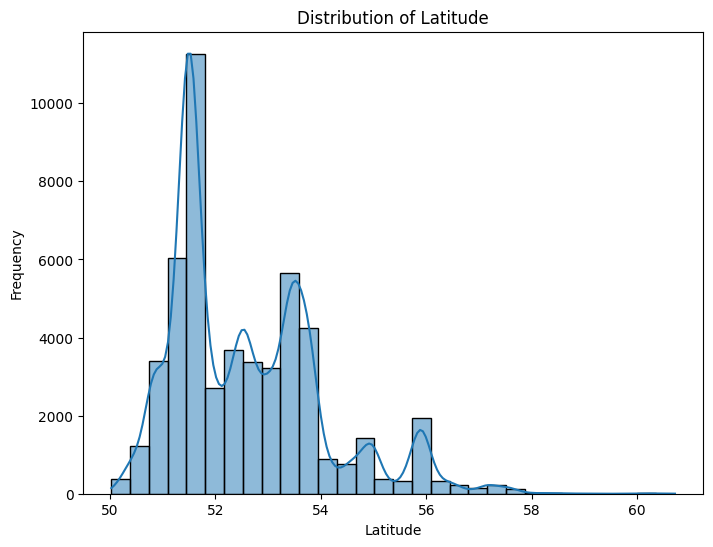

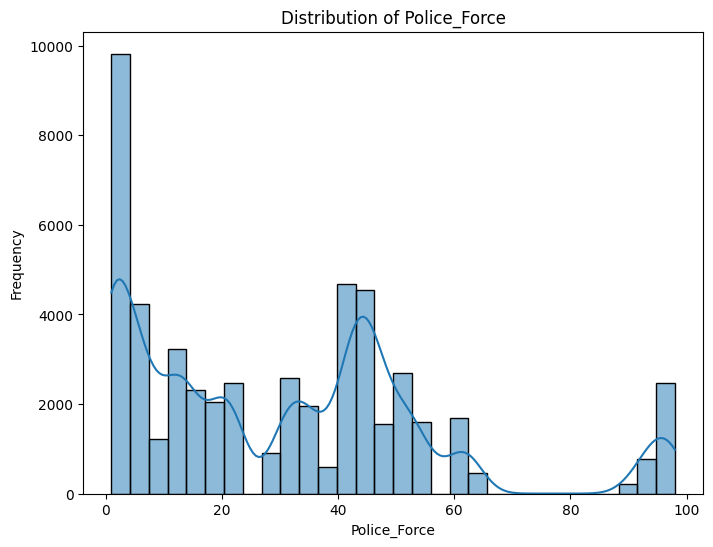

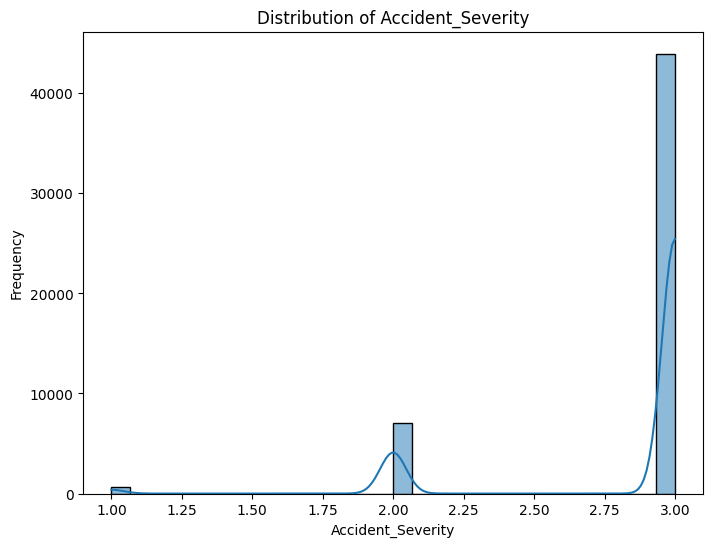

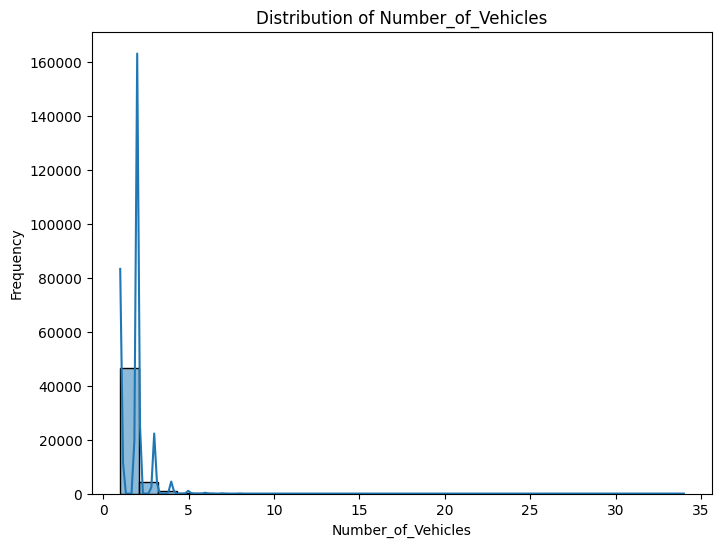

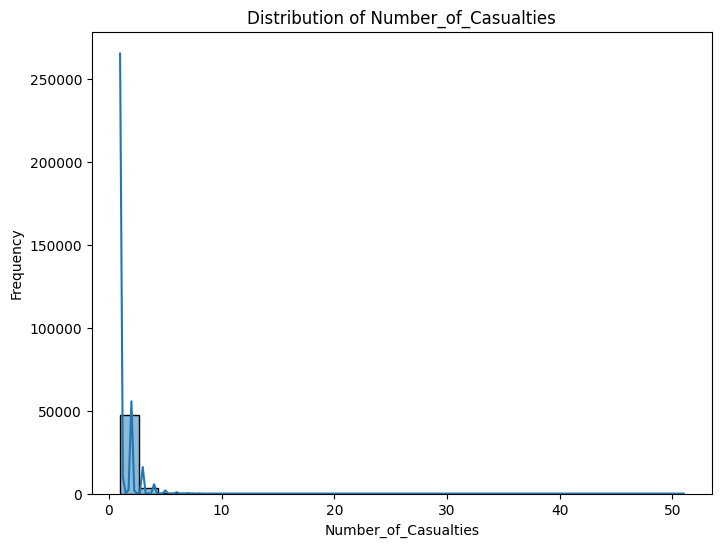

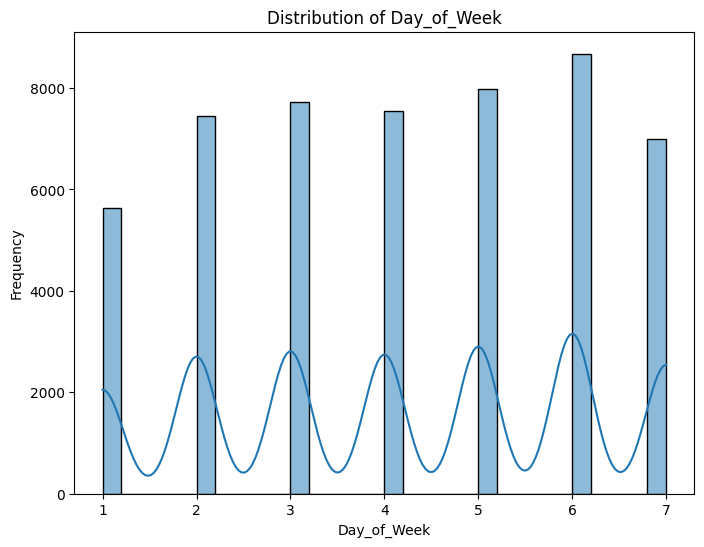

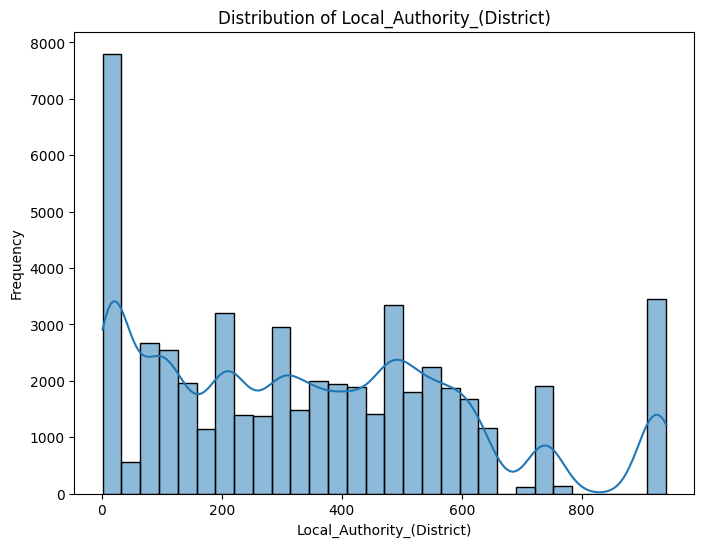

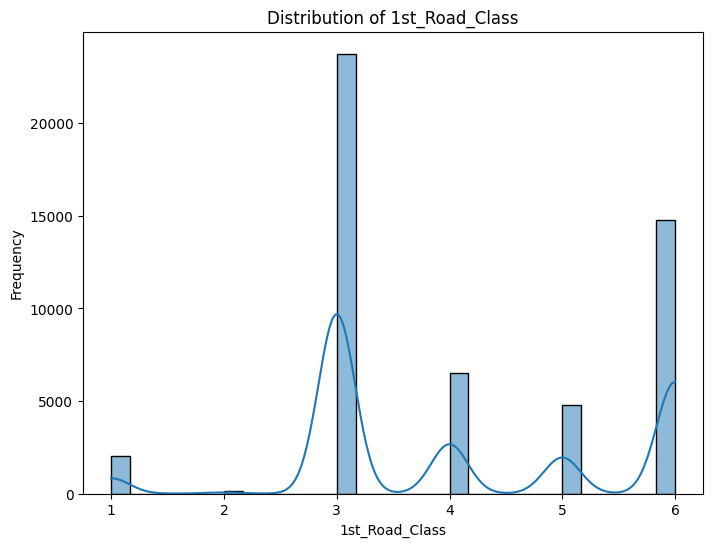

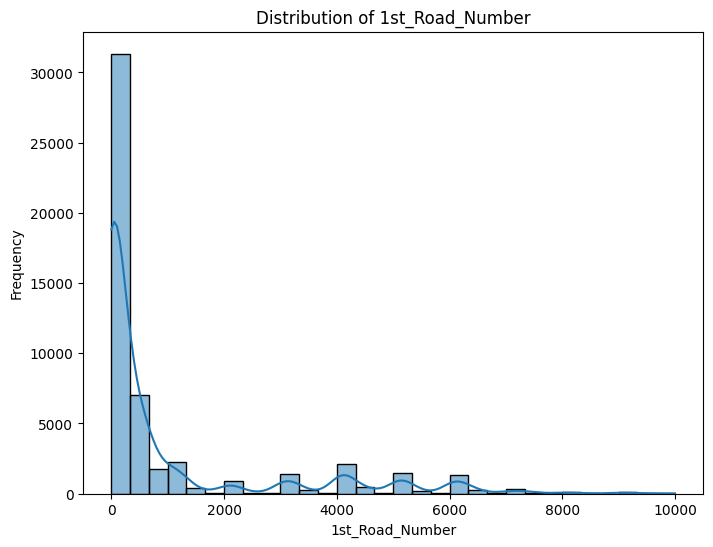

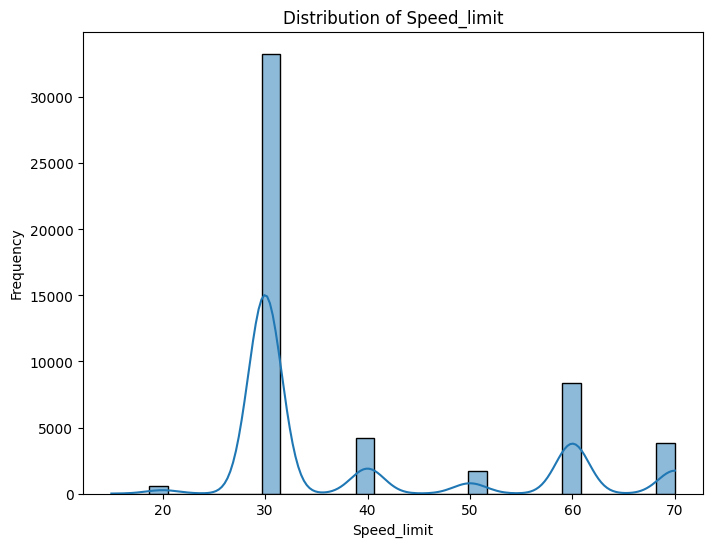

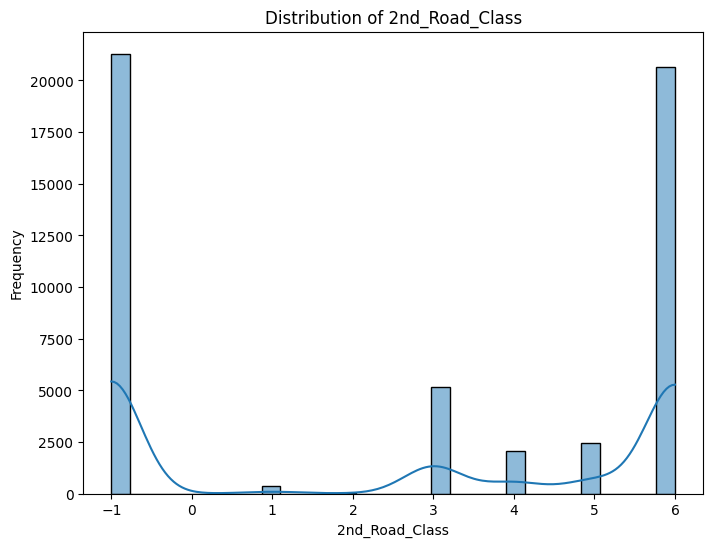

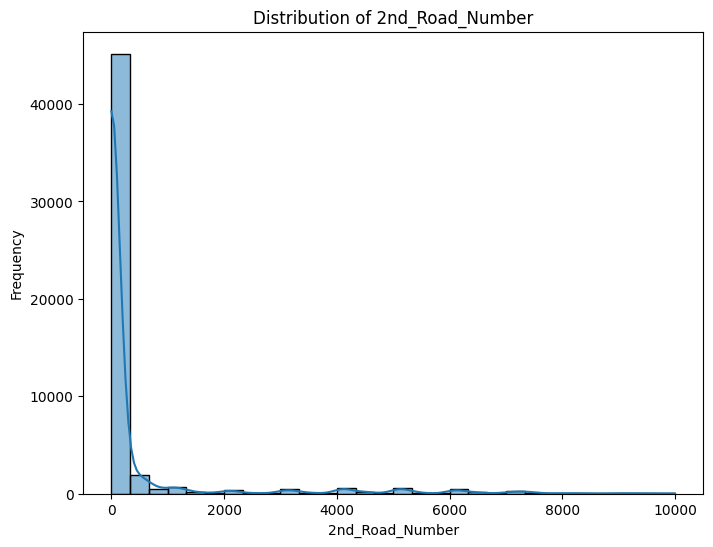

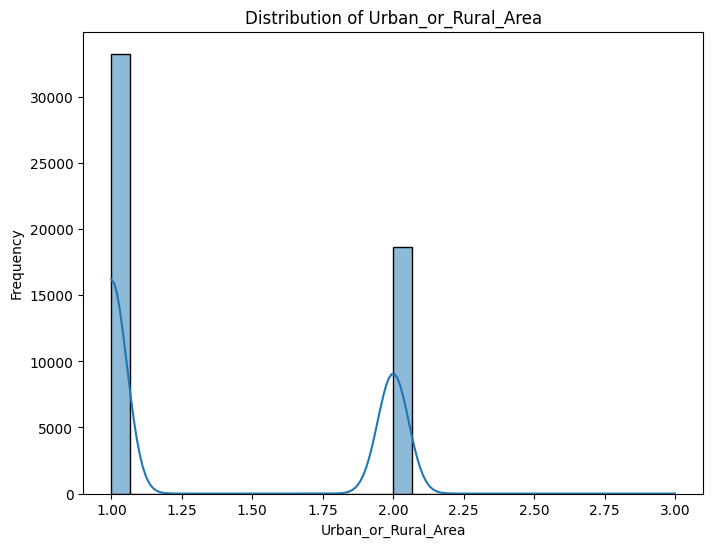

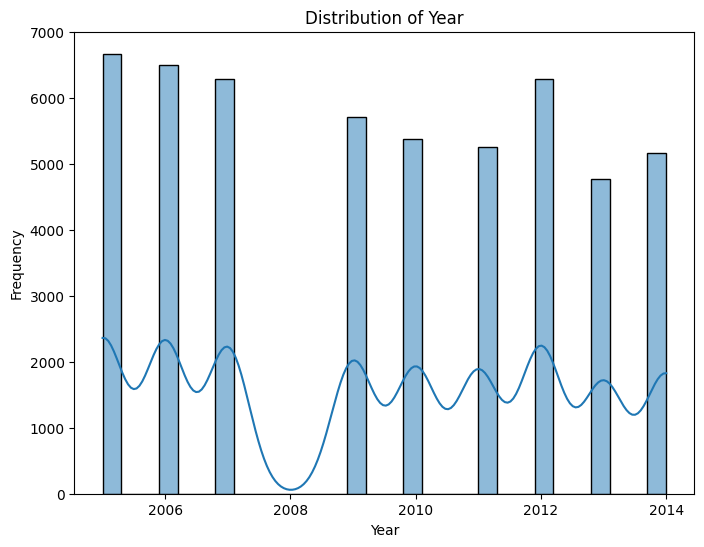

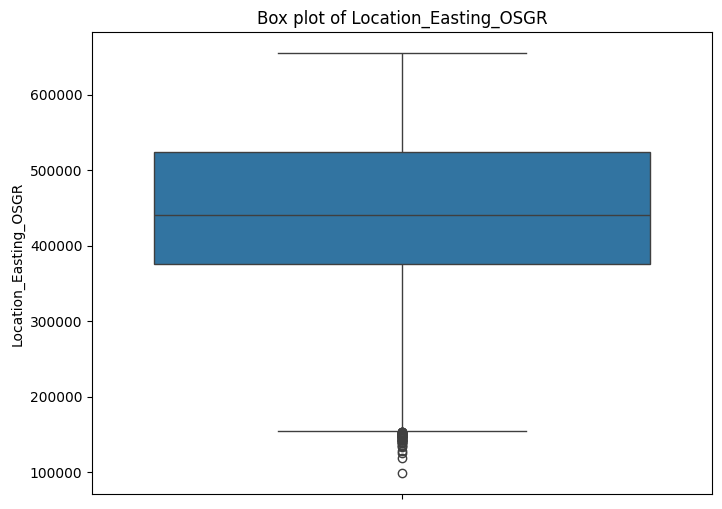

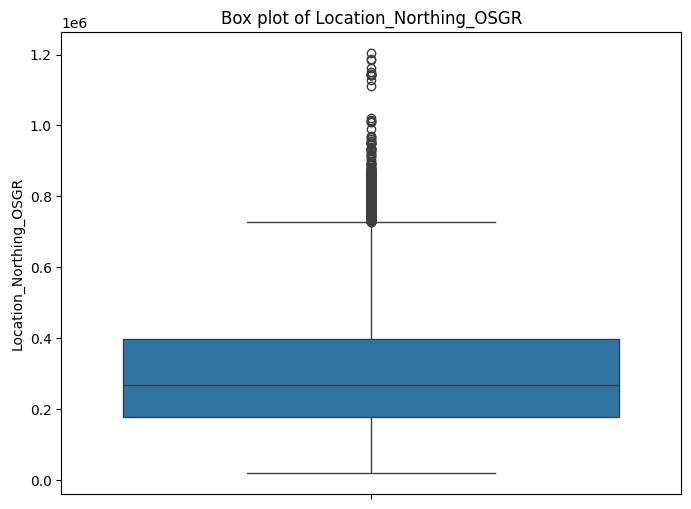

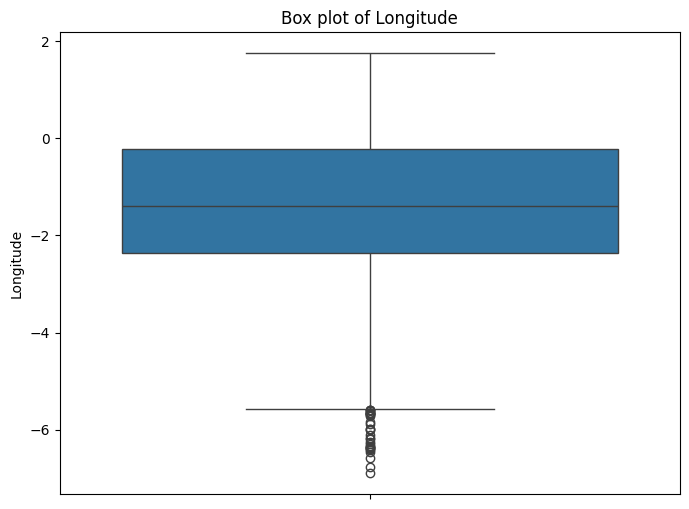

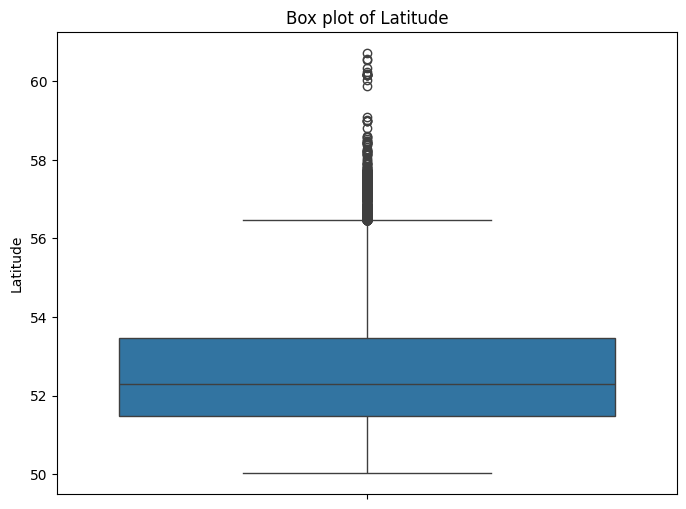

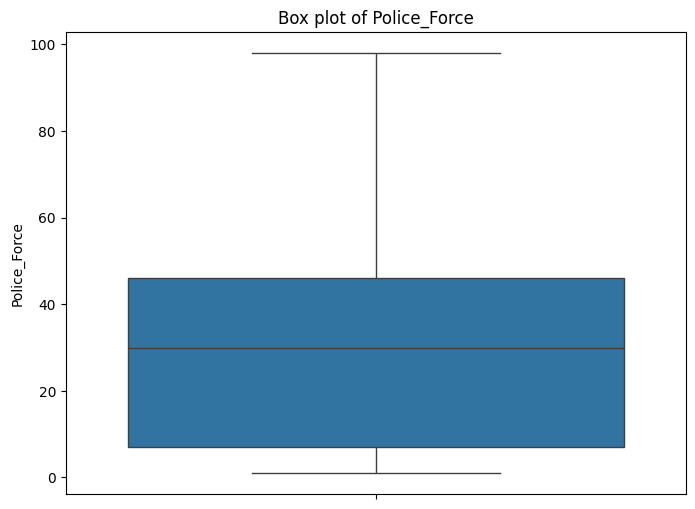

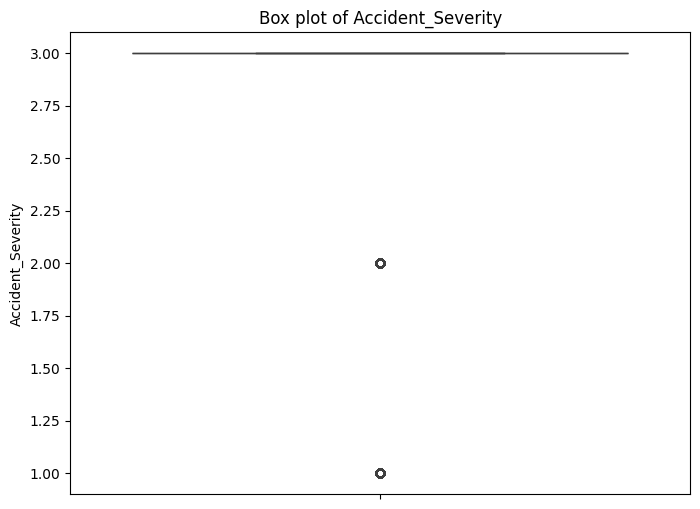

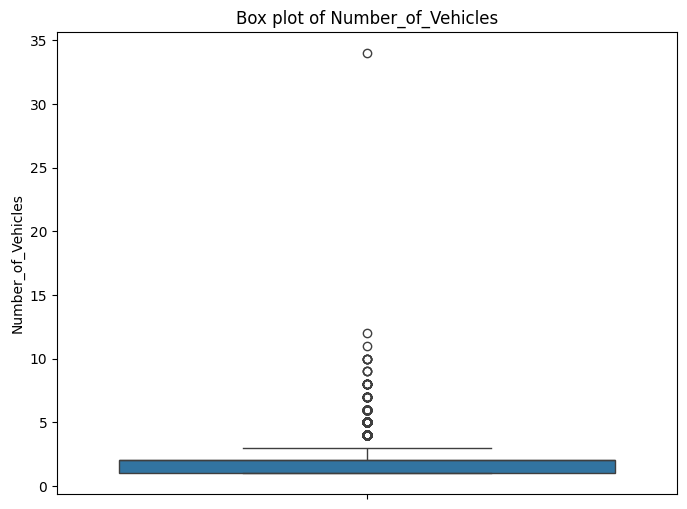

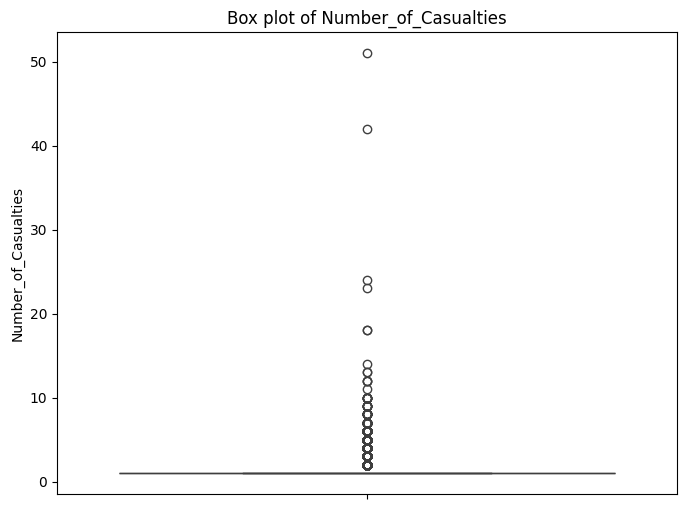

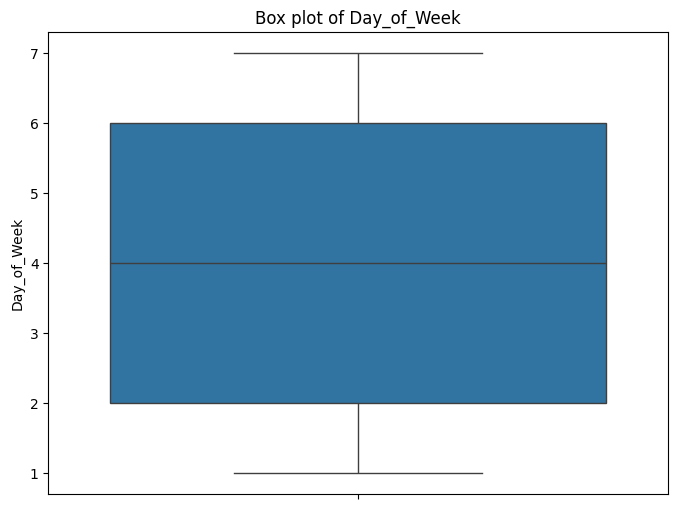

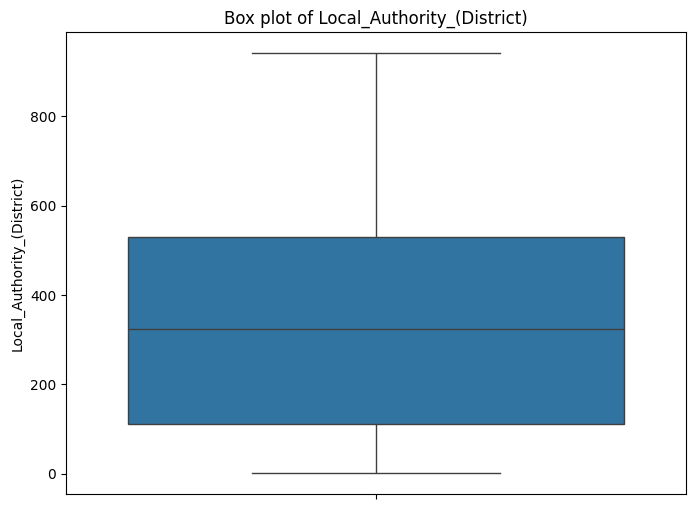

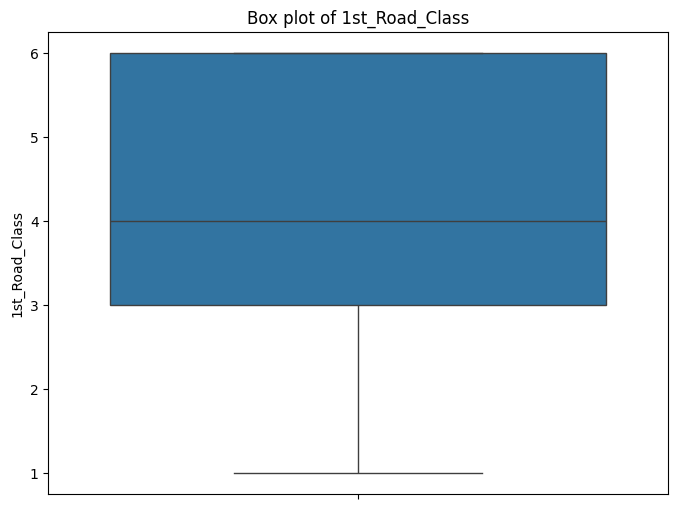

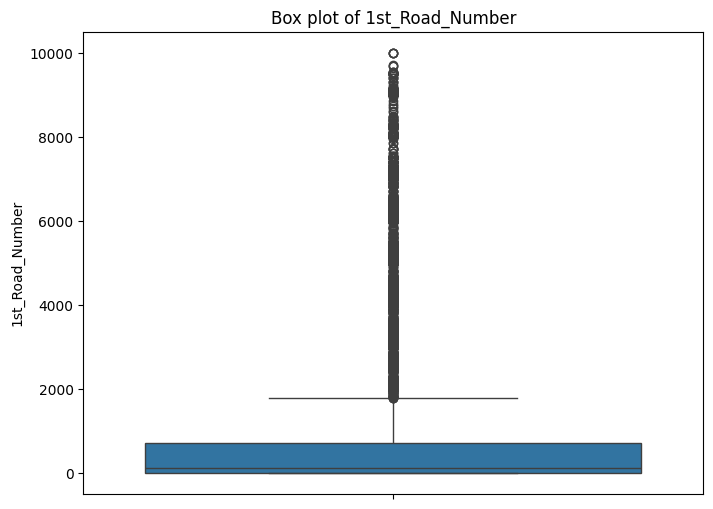

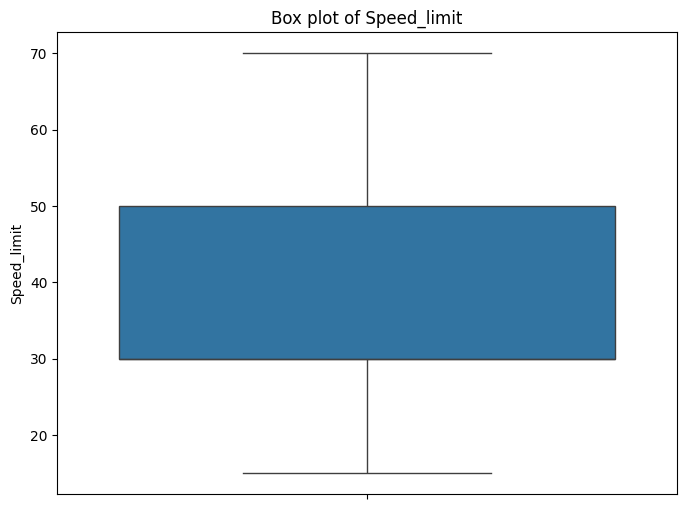

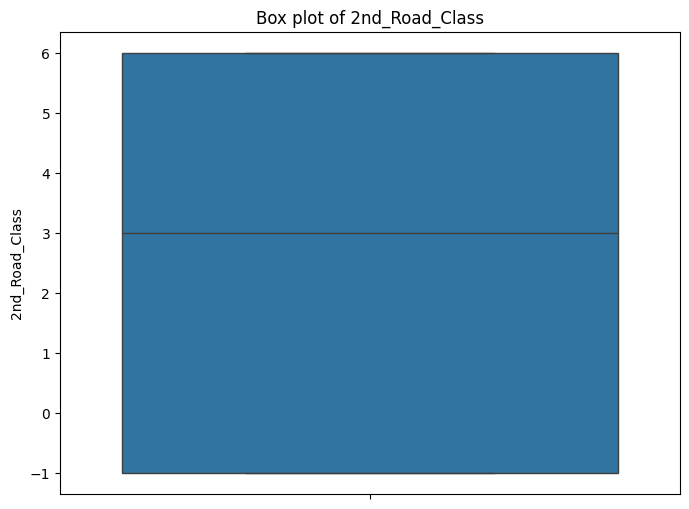

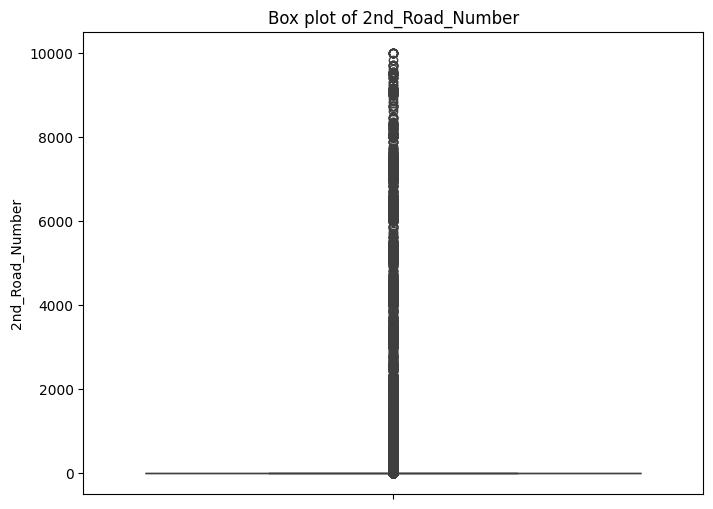

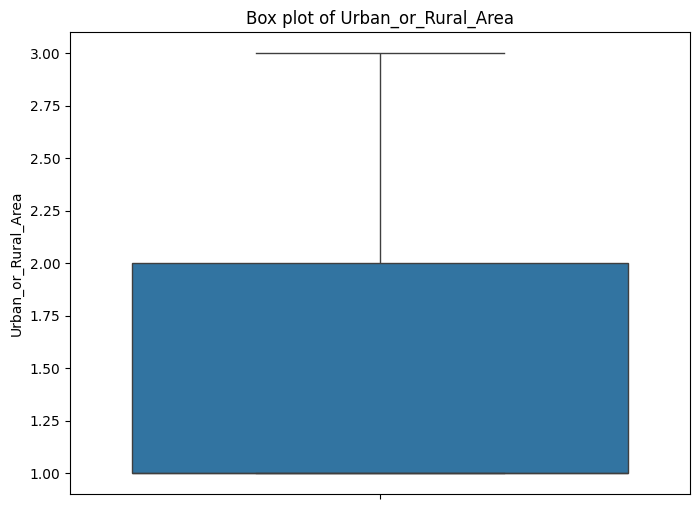

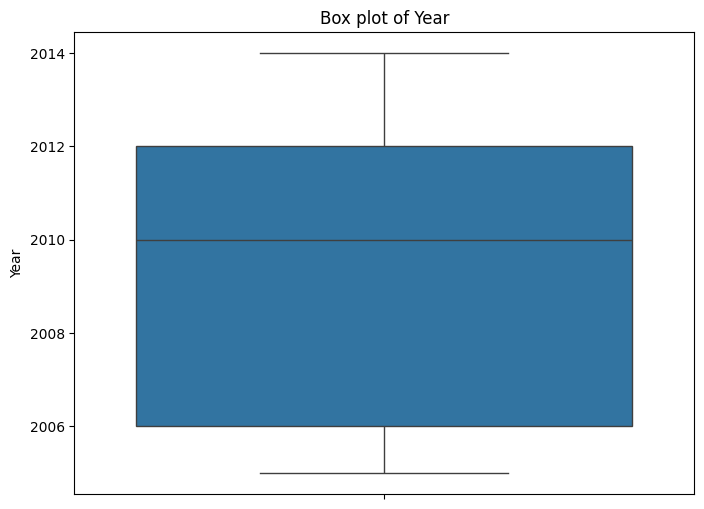

In [ ]:
# Histograms for numerical features
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots to check for outliers
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

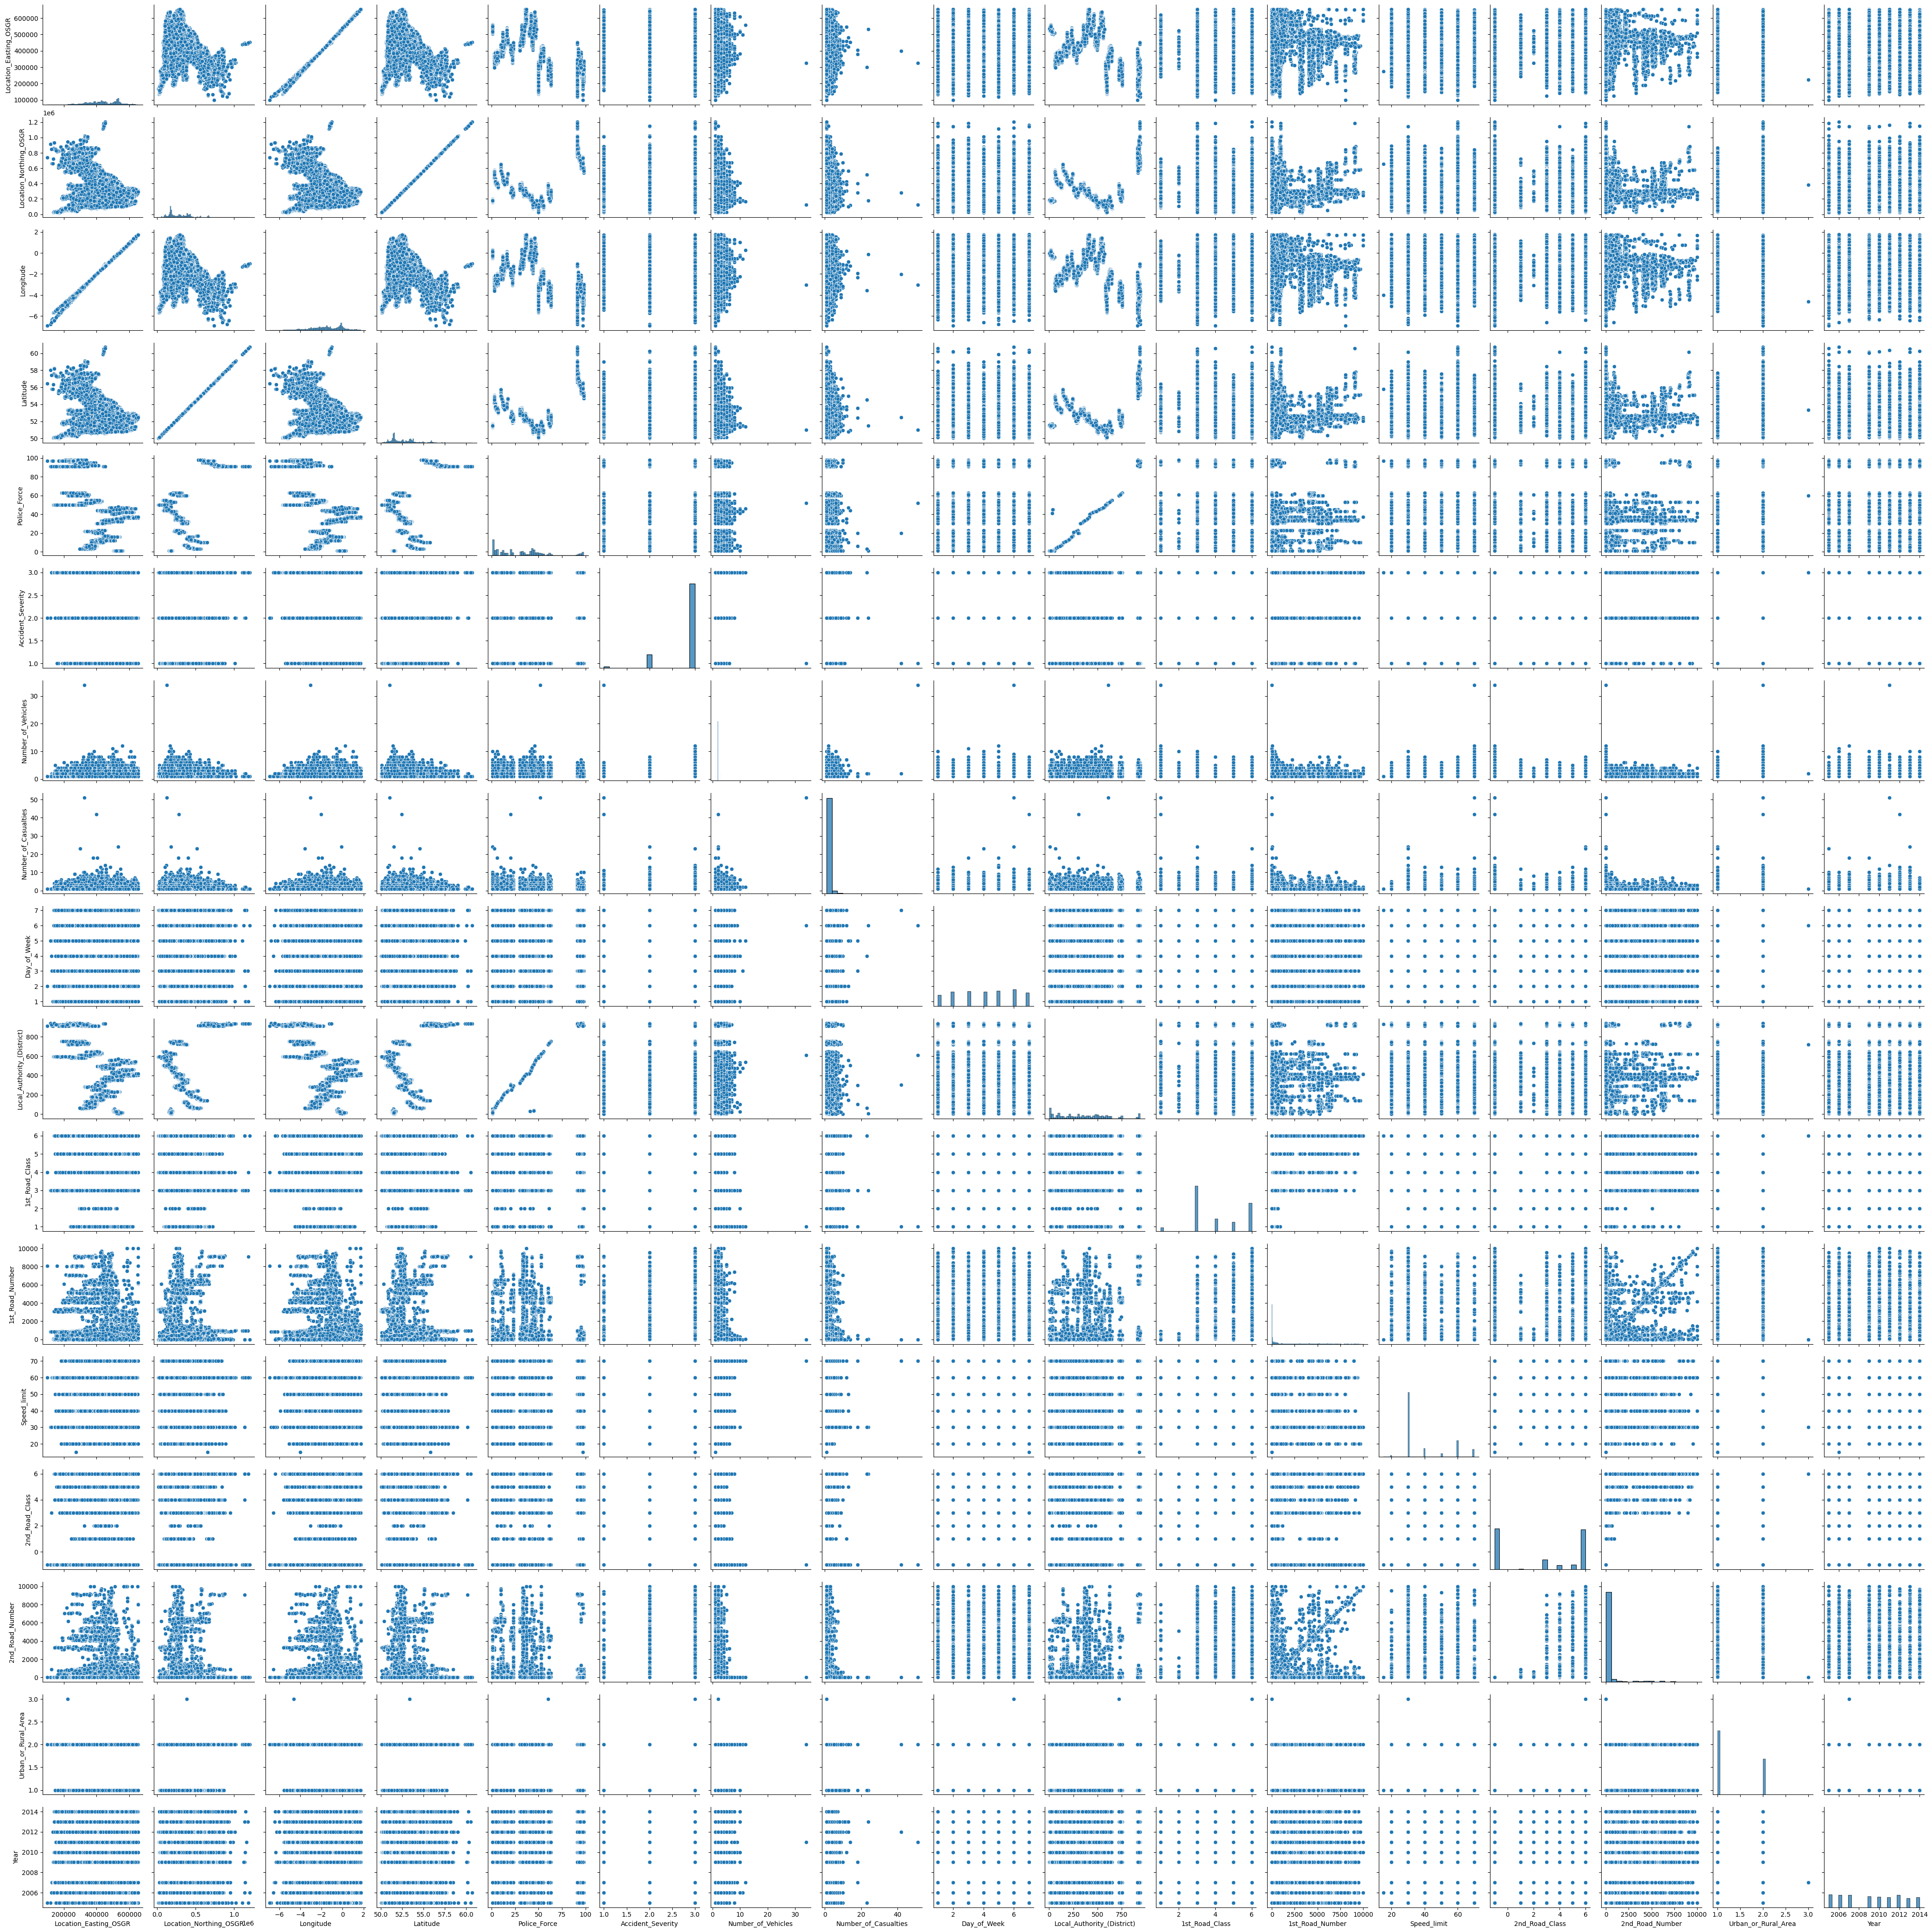

In [ ]:
# Pairplot to see relationships between numerical features
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()



In [ ]:
#Fill missing values with median for numerical features
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Cap outliers using the IQR method
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
#Create a new feature for time of day based on 'Time' column
### df['Hour'] = pd.to_datetime(df['Time']).dt.hour

KeyError: 'Time'

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
#Remove the outliers

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, numerical_cols):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df







In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Initialize PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance, or specify a number like n_components=2

#  PCA and transform the data
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])


df = pd.concat([df.drop(columns=numerical_cols), df_pca], axis=1)

print(df.head())


         Date Local_Authority_(Highway)           Road_Type  \
0  27/11/2009                 E10000011    Dual carriageway   
1  10/10/2010                 E09000017  Single carriageway   
2  14/09/2005                 W06000014  Single carriageway   
3  18/08/2007                 E10000017      One way street   
4  06/08/2013                 E06000021  Single carriageway   

  Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0             None within 50 metres   No physical crossing within 50 meters   
1             None within 50 metres   No physical crossing within 50 meters   
2             None within 50 metres   No physical crossing within 50 meters   
3             None within 50 metres   No physical crossing within 50 meters   
4             None within 50 metres   No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0            Darkeness: No street lighting     Raining with high winds  

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())



         Date Local_Authority_(Highway)           Road_Type  \
0  27/11/2009                 E10000011    Dual carriageway   
1  10/10/2010                 E09000017  Single carriageway   
2  14/09/2005                 W06000014  Single carriageway   
3  18/08/2007                 E10000017      One way street   
4  06/08/2013                 E06000021  Single carriageway   

  Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0             None within 50 metres   No physical crossing within 50 meters   
1             None within 50 metres   No physical crossing within 50 meters   
2             None within 50 metres   No physical crossing within 50 meters   
3             None within 50 metres   No physical crossing within 50 meters   
4             None within 50 metres   No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0            Darkeness: No street lighting     Raining with high winds  

In [ ]:
pca = PCA(n_components=0.95)  # Keep 95% of variance can be change this as needed

# PCA and transform the data
df_pca = pca.fit_transform(df_scaled)


#  Create a DataFrame with PCA components
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
# Step 6: Append PCA components to original DataFrame and drop original numerical columns
df = pd.concat([df.drop(columns=numerical_cols), df_pca], axis=1)


print(df.head())

         Date Local_Authority_(Highway)           Road_Type  \
0  27/11/2009                 E10000011    Dual carriageway   
1  10/10/2010                 E09000017  Single carriageway   
2  14/09/2005                 W06000014  Single carriageway   
3  18/08/2007                 E10000017      One way street   
4  06/08/2013                 E06000021  Single carriageway   

  Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0             None within 50 metres   No physical crossing within 50 meters   
1             None within 50 metres   No physical crossing within 50 meters   
2             None within 50 metres   No physical crossing within 50 meters   
3             None within 50 metres   No physical crossing within 50 meters   
4             None within 50 metres   No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0            Darkeness: No street lighting     Raining with high winds  

In [ ]:

from sklearn.preprocessing import OneHotEncoder

nominal_cols = ['Day of the Week']

# Step 2: Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap


# Step 5: Update the original DataFrame
# Drop the original categorical columns and append the new one-hot encoded features
df = pd.concat([df.drop(columns=nominal_cols), encoded_df], axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())


KeyError: "['Day of the Week'] not found in axis"

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [64]:
# Select relevant features for clustering
relevant_features = ['Day of the Week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Traffic Situation']

# Create a new DataFrame with these features
df_clustering = df[relevant_features]

# Convert categorical features using one-hot encoding
df_clustering = pd.get_dummies(df_clustering, columns=['Day of the Week', 'Traffic Situation'], drop_first=True)

# Display the DataFrame with selected features
print(df_clustering.head())


KeyError: "None of [Index(['Day of the Week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount',\n       'Traffic Situation'],\n      dtype='object')] are in the [columns]"

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [67]:

print(df[['Longitude', 'Latitude']].head())

# Ensure columns are numeric
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

# Drop rows with NaN values in Longitude or Latitude
df = df.dropna(subset=['Longitude', 'Latitude'])

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

KeyError: "None of [Index(['Longitude', 'Latitude'], dtype='object')] are in the [columns]"

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

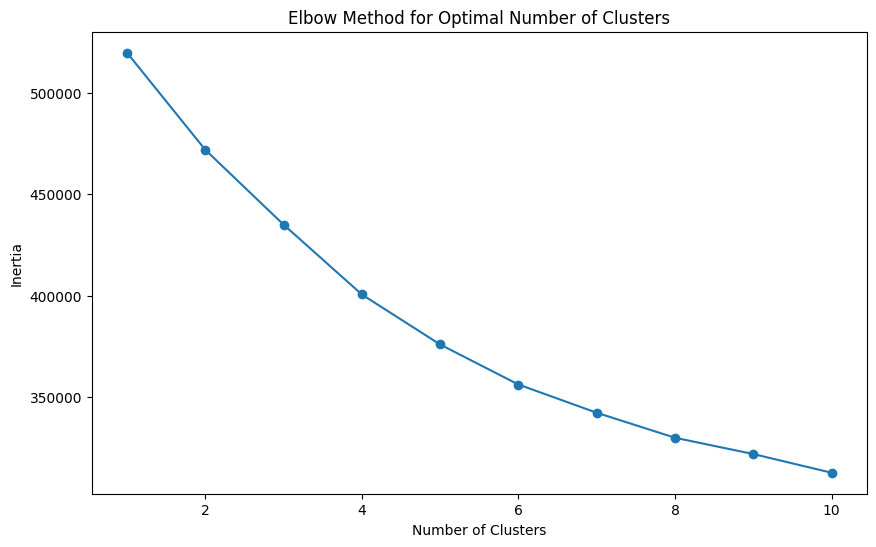

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NameError: name 'df_clustering' is not defined

In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define the range of clusters to try
cluster_range = range(1, 11)

inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 3: Apply K-Means with the chosen number of clusters

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(df_scaled)

print(df_clustering.head())


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [76]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_scaled, df_clustering['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5125226673660885


## Plot the data points with their predicted cluster center

In [81]:
from sklearn.cluster import kmeans_plusplus
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
centers, indices = kmeans_plusplus(X, n_clusters=2, random_state=0)
centers
indices

array([3, 2])

In [82]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Inverse transform cluster centers to original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


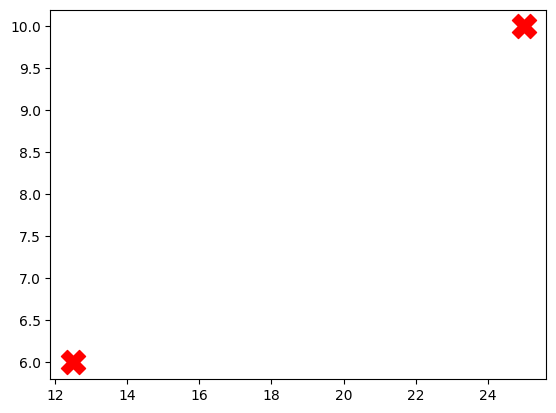

In [87]:

cluster_centers_original = scaler.inverse_transform(cluster_centers)

#plt.figure(figsize=(10, 8))

#sns.scatterplot(x='', y='Longitude', hue='Latitude', data=df, palette='Set1', alpha=0.7)


plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1],
            s=300, c='red', marker='X', label='Cluster Centers')

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?

* **Number of Clusters Choices:**
   - How did you determine the optimal number?
    **3 Cluster**
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   **Calculate Silhouette Score**
# How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Because silhouette score assesses how similar each data point is to its own cluster compared to other clusters.